In [ ]:

import matplotlib
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LinearRegression

data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv")


m_mark = data['Midterm mark']
f_mark = data['Final mark']

m = -0.5
b = 0

data


,Midterm mark,Final mark
0,32.5,31.7
1,53.4,68.8
2,61.5,62.6
3,47.5,71.5
4,59.8,87.2
...,...,...
95,50.0,81.5
96,49.2,72.1
97,50.0,85.2
98,48.1,66.2


Standarization

In [ ]:


midterm_Mean = m_mark.mean()
final_Mean = f_mark.mean()

midterm_Standard = m_mark.std()
final_Standard = f_mark.std()

midterm_Standardization = (m_mark - midterm_Mean)/midterm_Standard
final_Standardization = (f_mark - final_Mean)/final_Standard

print("Midterm Mean is:", midterm_Mean)
print("Final Mean is:", final_Mean)

print("Midterm Standard Deviation is:", midterm_Standard)
print("Final Standard Deviation is:", final_Standard)

print("Midterm Standardization is given below: ", midterm_Standardization)
print("Final Standardization is given below: ", final_Standardization)



Midterm Mean is: 48.959
Final Mean is: 72.735
Midterm Standard Deviation is: 9.746494785617063
Final Standard Deviation is: 16.658248631676365
Midterm Standardization is given below:  0    -1.688710
1     0.455651
2     1.286719
3    -0.149695
4     1.112297
        ...   
95    0.106808
96    0.024727
97    0.106808
98   -0.088134
99   -2.447957
Name: Midterm mark, Length: 100, dtype: float64
Final Standardization is given below:  0    -2.463344
1    -0.236219
2    -0.608407
3    -0.074137
4     0.868339
        ...   
95    0.526166
96   -0.038119
97    0.748278
98   -0.392298
99   -1.154683
Name: Final mark, Length: 100, dtype: float64


Error (Cost function)

In [ ]:

def execute_error(midterm_Standardization, final_Standardization, m, b):

    predictions = (midterm_Standardization * m) + b
    error = np.mean((final_Standardization - predictions) ** 2)
    return error



# Calculate the error with the initial model parameters
error = execute_error(midterm_Standardization, final_Standardization, m, b)

print("Error (Cost Function) with initial m and b is:", error)


Error (Cost Function) with initial m and b is: 2.0032433621324923


Gradient Partial Derivatives

In [ ]:
import numpy as np

def execute_gradients(midterm_Standardization, final_Standardization, m, b):
    """
    - dm: derivative of the cost function with respect to m
    - db: derivative of the cost function with respect to b
    """
    # Calculate the number of data points
    N = len(final_Standardization)
    predictions = (midterm_Standardization * m) + b
    errors = final_Standardization - predictions
    dm = (-2 / N) * np.sum(midterm_Standardization * errors)
    db = (-2 / N) * np.sum(errors)
    return dm, db

dm, db = execute_gradients(midterm_Standardization, final_Standardization, m, b)

print("Gradient with respect to m (dm):", dm)
print("Gradient with respect to b (db):", db)


Gradient with respect to m (dm): -2.5214867242649848
Gradient with respect to b (db): 2.753353101070388e-16


Updating m and b using a learning rate

In [ ]:

# Set the learning rate
alpha = 0.0001

# Initialize m and b
m = -0.5
b = 0

m = m - alpha * dm
b = b - alpha * db

print("New m:", m)
print("New b:", b)


New m: -0.4997478513275735
New b: -2.7533531010703883e-20


**Using Standardization Data**

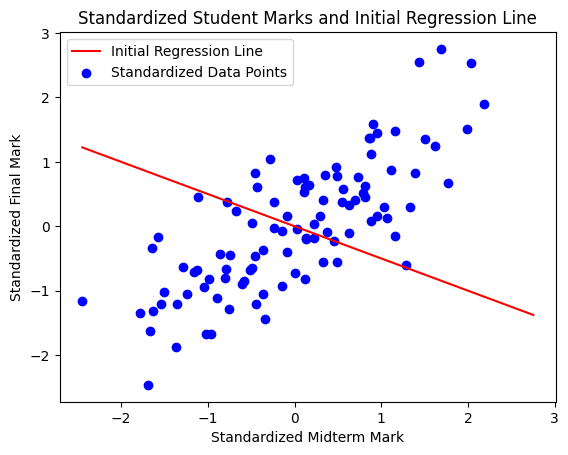

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Defining the range of x values
x_values = np.linspace(min(midterm_Standardization), max(final_Standardization))

# Calculate the corresponding y values for the regression line
y_values = -0.5 * x_values

# Plot the initial regression line
plt.plot(x_values, y_values, color='red', label='Initial Regression Line')


# Plot the standardized data points
plt.scatter(midterm_Standardization, final_Standardization, color='blue', label='Standardized Data Points')
plt.title('Standardized Student Marks and Initial Regression Line')
plt.xlabel('Standardized Midterm Mark')
plt.ylabel('Standardized Final Mark')


plt.legend()
plt.show()


Update b and m 100 times

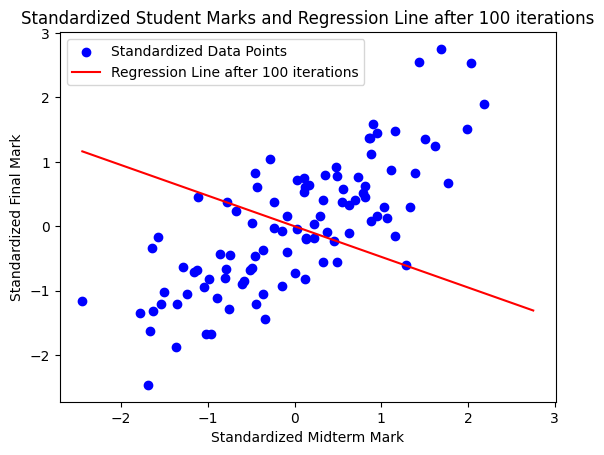

In [ ]:

alpha = 0.0001
m = -0.5
b = 0

# Perform 100 iterations
for i in range(100):
    dm, db = execute_gradients(midterm_Standardization, final_Standardization, m, b)
    m -= alpha * dm
    b -= alpha * db

# Plot the standardized data points and the regression line
plt.scatter(midterm_Standardization, final_Standardization, color='blue', label='Standardized Data Points')

# Calculate the y values of the regression line
x_values = np.linspace(min(midterm_Standardization), max(final_Standardization), 100)
y_predicted = m * x_values + b

# Plot the regression line
plt.plot(x_values, y_predicted, color='red', label='Regression Line after 100 iterations')

plt.title('Standardized Student Marks and Regression Line after 100 iterations')
plt.xlabel('Standardized Midterm Mark')
plt.ylabel('Standardized Final Mark')

plt.legend()

plt.show()


Error at each Iteration from Initial to 100 Iterations

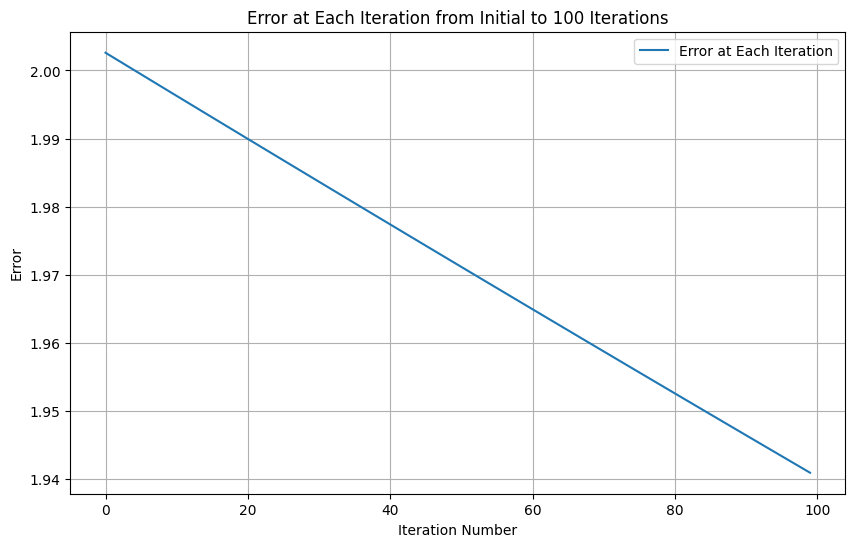

In [ ]:
alpha = 0.0001
m = -0.5
b = 0

# Error at each iteration
errors = []

# Perform 100 iterations
for i in range(100):
    dm, db = execute_gradients(midterm_Standardization, final_Standardization, m, b)
    m -= alpha * dm
    b -= alpha * db

    # Calculate and record the error
    current_error = execute_error(midterm_Standardization, final_Standardization, m, b)
    errors.append(current_error)

plt.figure(figsize=(10, 6))
plt.plot(errors, label = 'Error at Each Iteration')
plt.title('Error at Each Iteration from Initial to 100 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()


Update b and m for 2000 Iterations

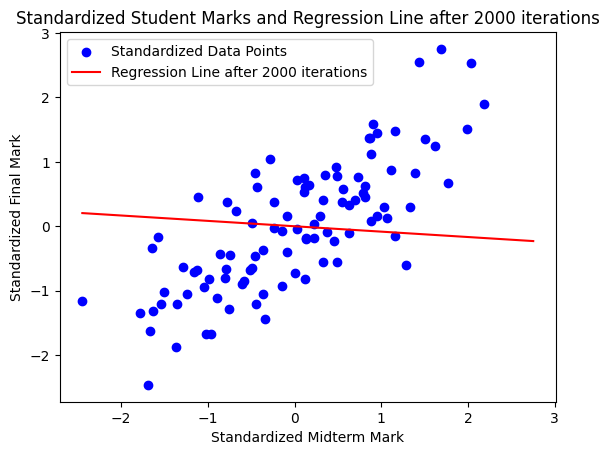

In [ ]:

alpha = 0.0001
m = -0.5
b = 0

# Perform 2000 iterations
for i in range(2000):
    dm, db = execute_gradients(midterm_Standardization, final_Standardization, m, b)
    m -= alpha * dm
    b -= alpha * db

# Pplot the standardized data points and the regression line
plt.scatter(midterm_Standardization, final_Standardization, color='blue', label='Standardized Data Points')

# Calculate the y values of the regression line
x_values = np.linspace(min(midterm_Standardization), max(final_Standardization), 2000)
y_predicted = m * x_values + b

# Plot the regression line
plt.plot(x_values, y_predicted, color='red', label='Regression Line after 2000 iterations')

plt.title('Standardized Student Marks and Regression Line after 2000 iterations')
plt.xlabel('Standardized Midterm Mark')
plt.ylabel('Standardized Final Mark')

plt.legend()

plt.show()

Error at each Iteration from Initial to 2000 Iterations

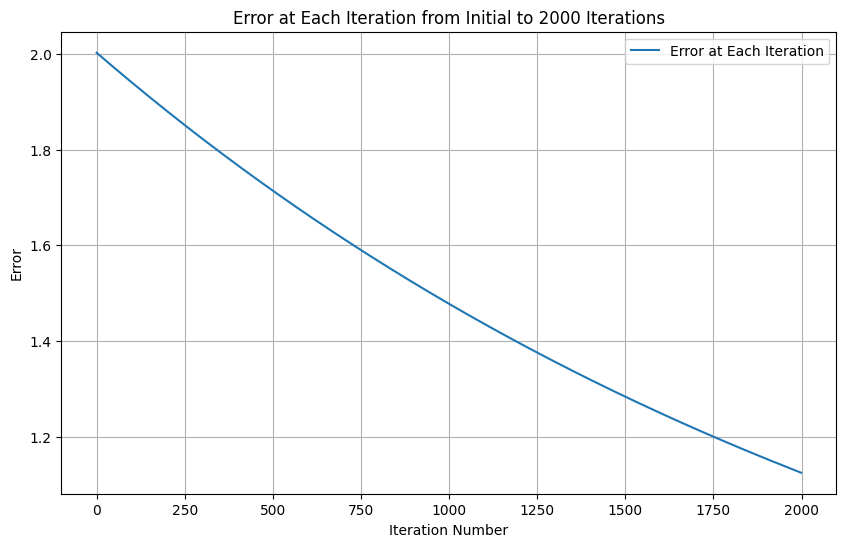

In [ ]:
alpha = 0.0001
m = -0.5
b = 0

# Error at each iteration
errors = []

# Perform 2000 iterations
for i in range(2000):
    dm, db = execute_gradients(midterm_Standardization, final_Standardization, m, b)
    m -= alpha * dm
    b -= alpha * db

    # Calculate and record the error
    current_error = execute_error(midterm_Standardization, final_Standardization, m, b)
    errors.append(current_error)


plt.figure(figsize=(10, 6))
plt.plot(errors, label = 'Error at Each Iteration')
plt.title('Error at Each Iteration from Initial to 2000 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()

**Using Non-Standardization Data**

Non-Standardization Data

In [ ]:
midterm_Mean = m_mark.mean()
final_Mean = f_mark.mean()

midterm_Standard = m_mark.std()
final_Standard = f_mark.std()



print("Midterm Mean is:", midterm_Mean)
print("Final Mean is:", final_Mean)

print("Midterm Standard Deviation is:", midterm_Standard)
print("Final Standard Deviation is:", final_Standard)

m = -0.5
b = 0


Midterm Mean is: 48.959
Final Mean is: 72.735
Midterm Standard Deviation is: 9.746494785617063
Final Standard Deviation is: 16.658248631676365


Error (Cost function)

In [ ]:
import numpy as np
def execute_error(m_mark, f_mark, m, b):

    predictions = (m_mark * m) + b
    error = np.mean((f_mark - predictions) ** 2)
    return error



# Calculate the error
error = execute_error(m_mark, f_mark, m, b)

print("Error (Cost Function) with initial m and b is:", error)

Error (Cost Function) with initial m and b is: 9873.218075


Gradient Partial Derivatives

In [ ]:
import numpy as np

def execute_gradients(m_mark, f_mark, m, b):

# Calculate the number of data points
    N = len(f_mark)
    predictions = (m_mark * m) + b
    errors = f_mark - predictions
    dm = (-2 / N) * np.sum(m_mark * errors)
    db = (-2 / N) * np.sum(errors)
    return dm, db


dm, db = execute_gradients(m_mark, f_mark, m, b)

print("Gradient with respect to m (dm):", dm)
print("Gradient with respect to b (db):", db)



Gradient with respect to m (dm): -9861.7451
Gradient with respect to b (db): -194.42900000000003


Updating m and b using a learning rate

In [ ]:
# Set the learning rate
alpha = 0.0001

# Initialize m and b
m = -0.5
b = 0

m = m - alpha * dm
b = b - alpha * db

print("New m:", m)
print("New b:", b)

New m: 0.48617451
New b: 0.019442900000000003


Non-Standardized Data Points with Initial Regression Line

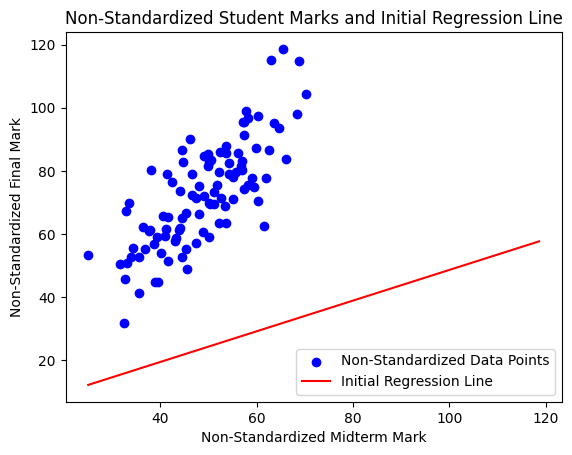

In [ ]:
import matplotlib.pyplot as plt
import numpy as np




# Plot the non-standardized data points
plt.scatter(m_mark, f_mark, color='blue', label='Non-Standardized Data Points')

# Define the range of x values for plotting the regression line
x_values = np.linspace(min(m_mark), max(f_mark))

# Calculate the corresponding y values for the regression line
y_values = m * x_values + b

# Plot the initial regression line
plt.plot(x_values, y_values, color='red', label='Initial Regression Line')


plt.title('Non-Standardized Student Marks and Initial Regression Line')
plt.xlabel('Non-Standardized Midterm Mark')
plt.ylabel('Non-Standardized Final Mark')


plt.legend()
plt.show()

Update b and m 100 times

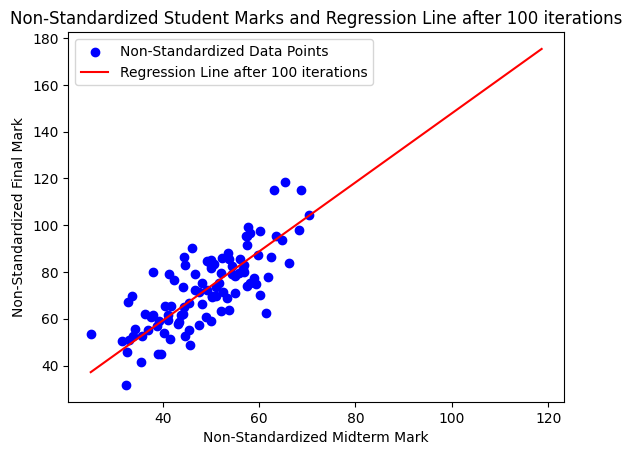

In [ ]:
alpha = 0.0001
m = -0.5
b = 0

# Perform 100 iterations
for i in range(100):
    dm, db = execute_gradients(m_mark, f_mark, m, b)
    m -= alpha * dm
    b -= alpha * db

# Plot the non-standardized data points and the regression line
plt.scatter(m_mark, f_mark, color='blue', label='Non-Standardized Data Points')

# Calculate the y values of the regression line
x_values = np.linspace(min(m_mark), max(f_mark), 100)
y_predicted = m * x_values + b

# Plot the regression line
plt.plot(x_values, y_predicted, color='red', label='Regression Line after 100 iterations')


plt.title('Non-Standardized Student Marks and Regression Line after 100 iterations')
plt.xlabel('Non-Standardized Midterm Mark')
plt.ylabel('Non-Standardized Final Mark')

plt.legend()

plt.show()

Error at each Iteration from Initial to 100 Iterations

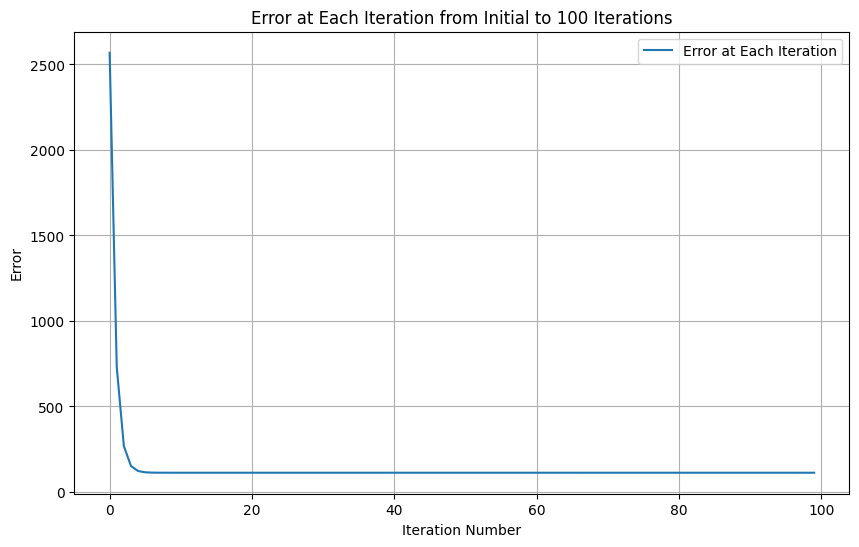

In [ ]:
alpha = 0.0001
m = -0.5
b = 0

# Error at each iteration
errors = []

# Perform 100 iterations
for i in range(100):
    dm, db = execute_gradients(m_mark, f_mark, m, b)
    m -= alpha * dm
    b -= alpha * db

    # Calculate and record the error
    current_error = execute_error(m_mark, f_mark, m, b)
    errors.append(current_error)


plt.figure(figsize=(10, 6))
plt.plot(errors, label = 'Error at Each Iteration')
plt.title('Error at Each Iteration from Initial to 100 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()


Update b and m for 2000 Iterations

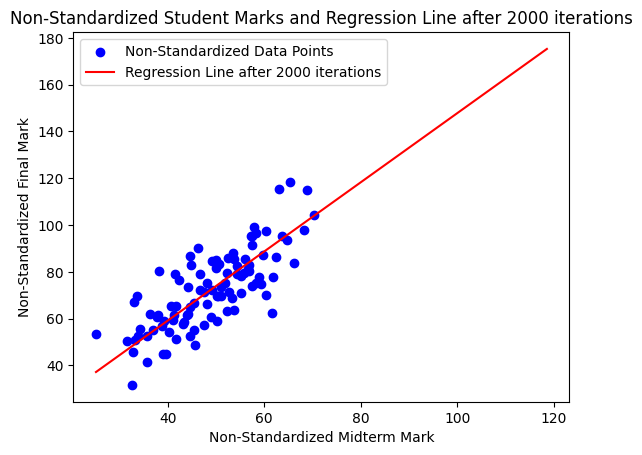

In [ ]:
alpha = 0.0001
m = -0.5
b = 0

# Perform 2000 iterations
for i in range(2000):
    dm, db = execute_gradients(m_mark, f_mark, m, b)
    m -= alpha * dm
    b -= alpha * db

# Plot the non-standardized data points and the regression line
plt.scatter(m_mark, f_mark, color='blue', label='Non-Standardized Data Points')

# Calculate the y values of the regression line
x_values = np.linspace(min(m_mark), max(f_mark), 2000)
y_predicted = m * x_values + b

# Plot the regression line
plt.plot(x_values, y_predicted, color='red', label='Regression Line after 2000 iterations')

plt.title('Non-Standardized Student Marks and Regression Line after 2000 iterations')
plt.xlabel('Non-Standardized Midterm Mark')
plt.ylabel('Non-Standardized Final Mark')




plt.legend()

plt.show()

Error at each Iteration from Initial to 2000 Iterations

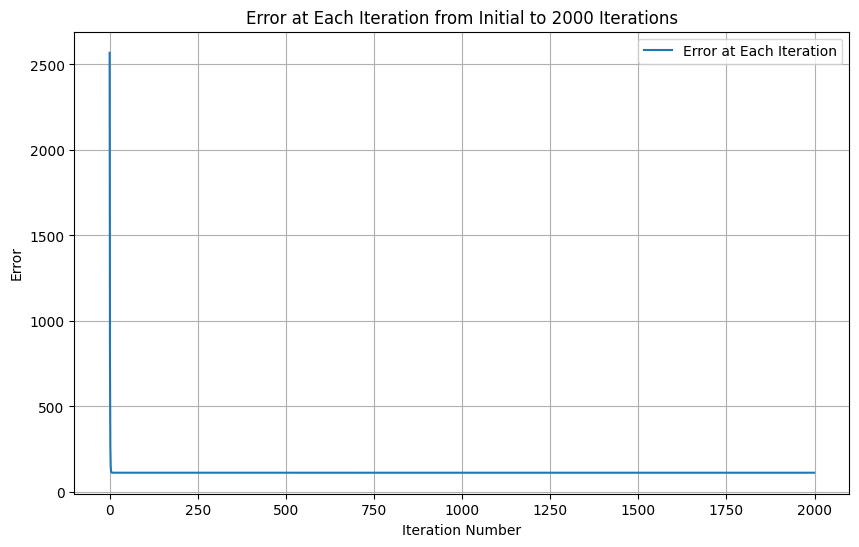

In [ ]:
alpha = 0.0001
m = -0.5
b = 0

# Error at each iteration
errors = []

# Perform 2000 iterations
for i in range(2000):
    dm, db = execute_gradients(m_mark, f_mark, m, b)
    m -= alpha * dm
    b -= alpha * db

    # Calculate and record the error
    current_error = execute_error(m_mark, f_mark, m, b)
    errors.append(current_error)


plt.figure(figsize=(10, 6))
plt.plot(errors, label = 'Error at Each Iteration')
plt.title('Error at Each Iteration from Initial to 2000 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()

**Q1: Write your observation by changing the learning rate to 0.1. Include error plots while explaining your observation.**

alpha changed to 0.1 (100 iterations Standardized Error graph)

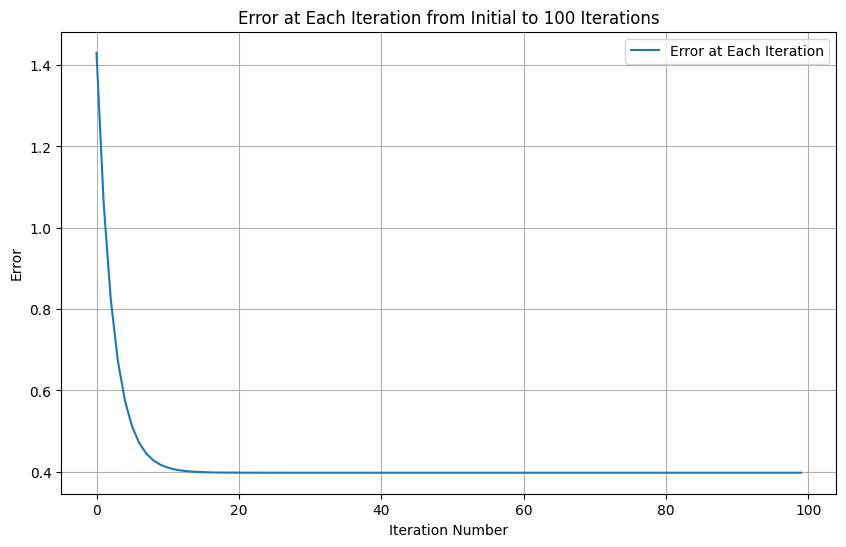

In [ ]:
alpha = 0.1
m = -0.5
b = 0

# Error at each iteration
errors = []

# Perform 100 iterations
for i in range(100):
    dm, db = execute_gradients(midterm_Standardization, final_Standardization, m, b)
    m -= alpha * dm
    b -= alpha * db

    # Calculate and record the error
    current_error = execute_error(midterm_Standardization, final_Standardization, m, b)
    errors.append(current_error)


plt.figure(figsize=(10, 6))
plt.plot(errors, label = 'Error at Each Iteration')
plt.title('Error at Each Iteration from Initial to 100 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()

alpha changed to 0.1 (2000 iterations Standardized Error graph)

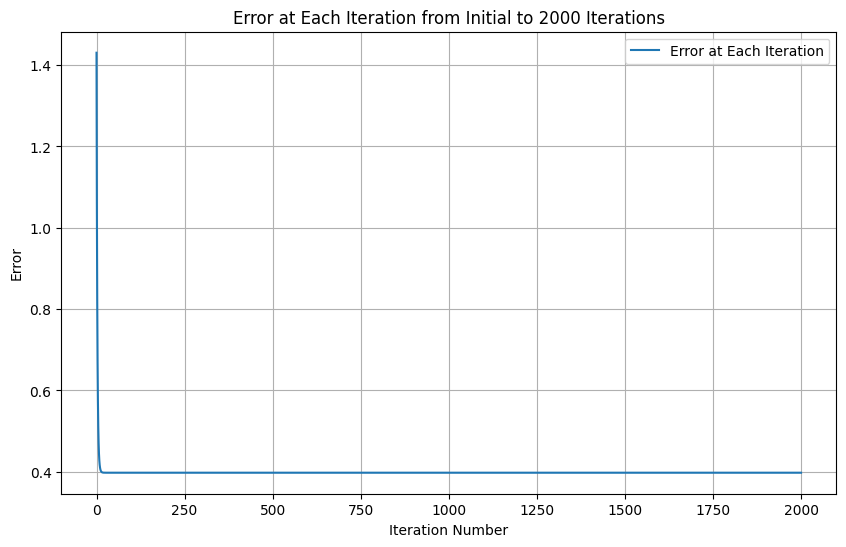

In [ ]:
alpha = 0.1
m = -0.5
b = 0

# Error at each iteration
errors = []

# Perform 2000 iterations
for i in range(2000):
    dm, db = execute_gradients(midterm_Standardization, final_Standardization, m, b)
    m -= alpha * dm
    b -= alpha * db

    # Calculate and record the error
    current_error = execute_error(midterm_Standardization, final_Standardization, m, b)
    errors.append(current_error)


plt.figure(figsize=(10, 6))
plt.plot(errors, label = 'Error at Each Iteration')
plt.title('Error at Each Iteration from Initial to 2000 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()

alpha changed to 0.1 (100 iterations Non-Standardized Error graph)

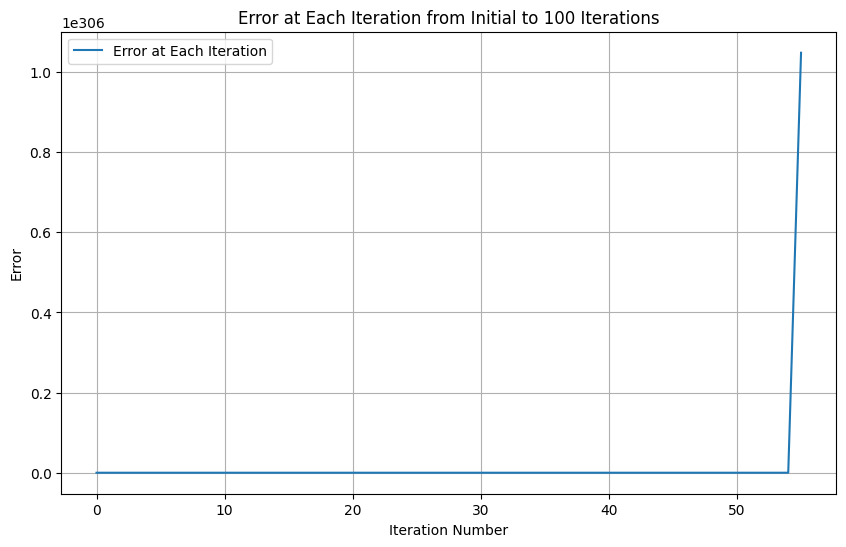

In [ ]:
alpha = 0.1
m = -0.5
b = 0

# Error at each iteration
errors = []

# Perform 100 iterations
for i in range(100):
    dm, db = execute_gradients(m_mark, f_mark, m, b)
    m -= alpha * dm
    b -= alpha * db

    # Calculate and record the error
    current_error = execute_error(m_mark, f_mark, m, b)
    errors.append(current_error)


plt.figure(figsize=(10, 6))
plt.plot(errors, label = 'Error at Each Iteration')
plt.title('Error at Each Iteration from Initial to 100 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()

alpha changed to 0.1 (2000 iterations Non-Standardized Error graph)

/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-24-c20814657b22>:11: RuntimeWarning: invalid value encountered in scalar subtract
  m -= alpha * dm
<ipython-input-24-c20814657b22>:12: RuntimeWarning: invalid value encountered in scalar subtract
  b -= alpha * db


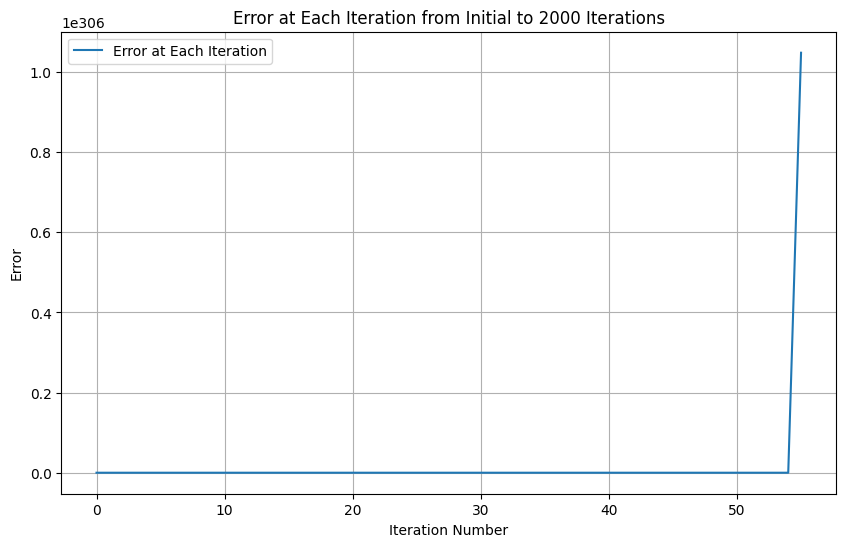

In [ ]:
alpha = 0.1
m = -0.5
b = 0

# Error at each iteration
errors = []

# Perform 2000 iterations
for i in range(2000):
    dm, db = execute_gradients(m_mark, f_mark, m, b)
    m -= alpha * dm
    b -= alpha * db

    # Calculate and record the error
    current_error = execute_error(m_mark, f_mark, m, b)
    errors.append(current_error)

plt.figure(figsize=(10, 6))
plt.plot(errors, label = 'Error at Each Iteration')
plt.title('Error at Each Iteration from Initial to 2000 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()

Q1: The high learning rate "0.1" is aggressive, resulting in quick initial convergence but with a significant chance of divergence or exceeding, particularly in non-standardized situation. A lower learning rate, such as 0.0001, provides consistency with steady improvement. For standardized data, a high learning rate can be effective up to a point of convergence, but for non-standardized data, the same learning rate might produce difference. A smaller learning rate, perhaps in the order of 0.001 or even smaller, might be more appropriate for this dataset.

Q2: The data points on the plot of standardized data clustered around the origin (0,0), which is a direct outcome of standardization where the mean is subtracted and the result is divided by the standard deviation. This is due to formula of standardization, z = (x - u)/sd. Where "x" is the actual data, "u" is the mean and sd represents standard deviation. Standardization also ensures that the scores are evenly distributed around the average. Suppose if one student's test scores were based on a 100-point scale, while another's were based on 200 points. Standardization reduces the size of the tests, allowing you to compare them equally. Due to everything being centered and scaled, its in an ideal position to create a line that best matches all of these points (the first regression line).